In [4]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


In [2]:
import os
import torch
from torchvision import datasets
import torchvision.transforms as transforms
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder('dog_images/train')
valid_data = datasets.ImageFolder('dog_images/valid')
test_data = datasets.ImageFolder('dog_images/test')

trainloader = torch.utils.data.DataLoader(train_data, batch_size=128, shuffle=True, num_workers=0)

validloader = torch.utils.data.DataLoader(valid_data, batch_size=128, shuffle=True, num_workers=0)

testloader = torch.utils.data.DataLoader(test_data,  batch_size=64, shuffle=False, num_workers=0)

loaders_scratch = {'train' : trainloader, 'valid' : validloader, 'test' : testloader}

print(train_data)

print(valid_data)

print(test_data)

Dataset ImageFolder
    Number of datapoints: 6680
    Root location: dog_images/train
Dataset ImageFolder
    Number of datapoints: 835
    Root location: dog_images/valid
Dataset ImageFolder
    Number of datapoints: 836
    Root location: dog_images/test


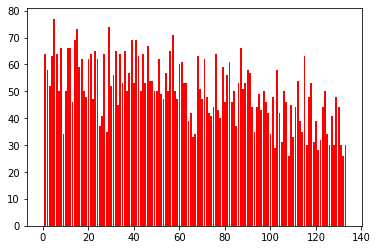

77 dog_images/train\005.Alaskan_malamute
26 dog_images/train\108.Norwegian_buhund
[64, 58, 52, 63, 77, 64, 50, 66, 34, 50, 66, 66, 46, 69, 73, 59, 62, 50, 48, 62, 64, 47, 65, 62, 37, 41, 64, 35, 74, 52, 56, 65, 45, 64, 53, 65, 50, 57, 69, 53, 69, 63, 50, 64, 53, 67, 54, 54, 50, 50, 62, 49, 47, 57, 50, 65, 71, 50, 47, 60, 61, 53, 53, 39, 42, 33, 34, 63, 51, 47, 62, 48, 42, 41, 44, 64, 43, 40, 59, 46, 56, 61, 46, 50, 37, 53, 66, 51, 53, 58, 57, 44, 35, 44, 49, 43, 50, 46, 42, 34, 48, 29, 58, 42, 31, 50, 46, 26, 45, 33, 44, 54, 39, 35, 63, 30, 48, 53, 31, 39, 28, 32, 44, 50, 34, 30, 41, 30, 48, 44, 30, 26, 30]


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

base_dir = "dog_images/train"
distribution = {}
number_list = []
max_class = 0
max_path = ''
min_class = 100
min_path = ''
for dirpath, dirnames, filenames in os.walk(base_dir):
    distribution[dirpath] = 0
    for filename in [f for f in filenames]: 
        distribution[dirpath] += 1
    if distribution[dirpath] != 0:
        number_list.append(distribution[dirpath])
        if distribution[dirpath] > max_class:
            max_class = distribution[dirpath]
            max_path = dirpath
        if distribution[dirpath] < min_class:
            min_class = distribution[dirpath]
            min_path = dirpath
        
keys, values = distribution.keys(), distribution.values()
plt.bar(range(len(values)), values, color='r')
plt.show()

print(max(number_list), max_path)

print(min(number_list), min_path)
print(number_list)


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

base_dir = "dog_images/test"
sizes = []    
widths = []
heights = []
for dirpath, dirnames, filenames in os.walk(base_dir):
    for dirname in [d for d in dirnames]: 
        files = os.listdir(base_dir + "/" + dirname)   
        for file in files:
            im = Image.open(base_dir + "/" + dirname + "/" + file)
            width, height = im.size
            sizes.append(im.size)   
            widths.append(width)
            heights.append(height)
            
#print(sizes)
print(max(widths))
print(max(heights))
print(min(widths))
print(min(heights))

3456
3072
121
153
